# ML - Assigmnent 3
## Author: Benjamin Brodwolf

In [1]:
import pandas as pd 
import numpy as np 

import sys
import random
import csv

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Task 1


In [2]:
df = pd.read_csv("house_data.csv", quoting=csv.QUOTE_NONE)

df.sqft_lot15 = df.sqft_lot15.apply( lambda x: int( x.strip('"') ) )

df.price = df.price.apply( lambda x: int( x ) )

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,"""7129300520","""""20141013T000000""""",221900,3,1.00,1180,5650,"""""1""""",0,0,...,7,1180,0,1955,0,"""""98178""""",47.5112,-122.257,1340,5650
1,"""6414100192","""""20141209T000000""""",538000,3,2.25,2570,7242,"""""2""""",0,0,...,7,2170,400,1951,1991,"""""98125""""",47.7210,-122.319,1690,7639
2,"""5631500400","""""20150225T000000""""",180000,2,1.00,770,10000,"""""1""""",0,0,...,6,770,0,1933,0,"""""98028""""",47.7379,-122.233,2720,8062
3,"""2487200875","""""20141209T000000""""",604000,4,3.00,1960,5000,"""""1""""",0,0,...,7,1050,910,1965,0,"""""98136""""",47.5208,-122.393,1360,5000
4,"""1954400510","""""20150218T000000""""",510000,3,2.00,1680,8080,"""""1""""",0,0,...,8,1680,0,1987,0,"""""98074""""",47.6168,-122.045,1800,7503


In [3]:
yrs_since_modified = [(2020 - build) if (reno == 0) else (2020 - reno) for (reno, build) in zip(df.yr_renovated, df.yr_built)]

df["yrs_since_modified"] = yrs_since_modified

features = ["price","sqft_living","sqft_lot","sqft_basement","sqft_above","yrs_since_modified","sqft_living15","sqft_lot15"]

DS1 = df[features]
DS1.head()

,price,sqft_living,sqft_lot,sqft_basement,sqft_above,yrs_since_modified,sqft_living15,sqft_lot15
0,221900,1180,5650,0,1180,65,1340,5650
1,538000,2570,7242,400,2170,29,1690,7639
2,180000,770,10000,0,770,87,2720,8062
3,604000,1960,5000,910,1050,55,1360,5000
4,510000,1680,8080,0,1680,33,1800,7503


### PCA Implmentation

In [4]:
def pca(X):
    #Run principal component analysis.
    
    m, n = X.shape

    U = np.zeros(n) #The eigenvectors, representing the computed principal components of X. 
                    # U has dimensions (n x n) where each column is a single principal component.
        
    S = np.zeros(n) # A vector of size n, contaning the singular values for each principal component. 
    
    eigenvectors = (1/m) * np.transpose(X) @ X
    
    U, S, V = np.linalg.svd( eigenvectors )

    return U, S, V

In [5]:
def feature_normalization(X):
    mu = np.mean(X,axis=0)
    sigma  = np.std(X,axis=0)
    X_norm = (X - mu) / sigma
    
    return X_norm , mu , sigma   

In [6]:
#  Before running PCA, it is important to first normalize the data
DS1_norm, mu, sigma = feature_normalization(DS1)
DS1_norm.head()

,price,sqft_living,sqft_lot,sqft_basement,sqft_above,yrs_since_modified,sqft_living15,sqft_lot15
0,-0.866717,-0.979835,-0.228321,-0.658681,-0.734708,0.638266,-0.943355,-0.260715
1,-0.005688,0.533634,-0.189885,0.245141,0.460841,-0.611465,-0.432686,-0.187868
2,-0.980849,-1.426254,-0.123298,-0.658681,-1.229834,1.401991,1.070140,-0.172375
3,0.174090,-0.130550,-0.244014,1.397515,-0.891699,0.291119,-0.914174,-0.284522
4,-0.081958,-0.435422,-0.169653,-0.658681,-0.130895,-0.472606,-0.272190,-0.192849


In [7]:
# Run PCA
U, S , V = pca(DS1_norm.values)

# U = EigenVector
# S = EigenValues

The first three principal components


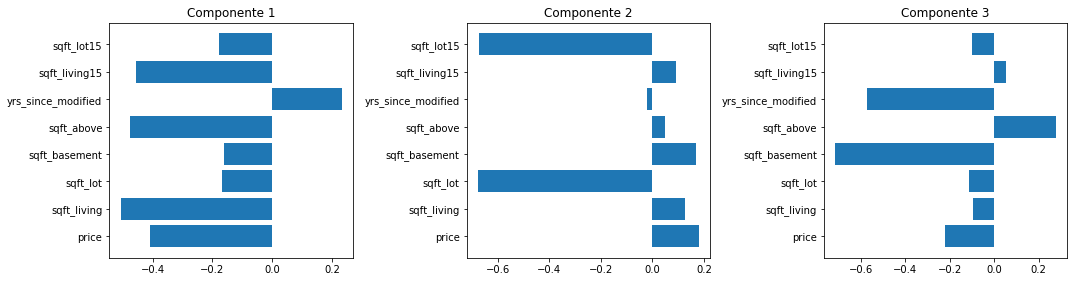

In [8]:
%matplotlib inline

print("The first three principal components")

y_pos = np.arange(len(features))

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title("Componente 1")
plt.barh(y_pos, U[:, 0])
plt.yticks(y_pos, features)

plt.subplot(1, 3, 2)
plt.title("Componente 2")
plt.barh(y_pos, U[:, 1], )
plt.yticks(y_pos, features)    
    
plt.subplot(1, 3, 3)
plt.title("Componente 3")
plt.barh(y_pos, U[:, 2])
plt.yticks(y_pos, features)        
    
plt.tight_layout(pad=1.0)

plt.show()

Component 1: The first component is partly well balanced and doesn't show any big extensions. But the features with the sqft and the price are good candidates compared to the "yrs_since_modified" and this component could be used to calculate: how big is the house compared to the price.

Component 2: This component has strong outliers on the features for plot: sqft_lot15 and sqft_lot.
This component is suitable to find out how big the plot area is in relation to the plot size.

Component 3: This component stands out with two features. It has two outlier features with "yrs_since_modified" and "sqft_basement". With this component you could find out whether older or newer houses have larger basement.

In [9]:
def projectData(X, U, K):
    
    x_size = X.shape[0]
    
    Z = np.zeros((x_size, K))
    
    for i in range(x_size):
        for k in range(K):
            x = X[i, :]
            Z[i, k] = x @ U[:, k]
    
    return Z

In [10]:
#  Project the data onto K = 3 dimension for the 3D-Plot
K = 3
Z_3d = projectData(DS1_norm.values, U, K)

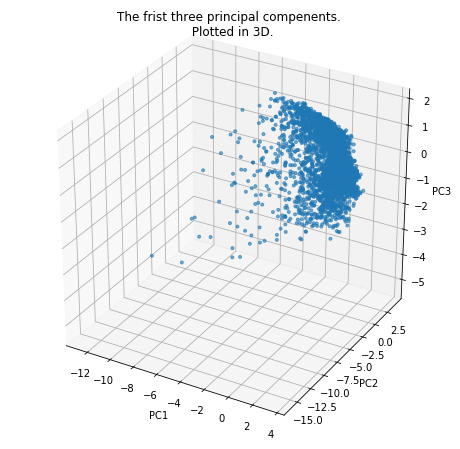

In [11]:
# RUN THIS CELL TWICE IF THE 3-D PLOT RENDERING NOT SHOWING

#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
samples = np.random.choice(DS1_norm.shape[0], size=3000)


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Z_3d[samples, 0], Z_3d[samples, 1], Z_3d[samples, 2], cmap='rainbow', s=3**2, alpha=0.6)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3");

plt.title("The frist three principal compenents. \n Plotted in 3D.")
plt.show()

The 3D plot shows how close the first 3 PC are to each other. It has the shape of a cloud.
In Task 5 we will see how all datapoints are clustered.

# Task 2

In [12]:
tot = sum(S)
variance_explained = [(i / tot)*100 for i in sorted(S, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)

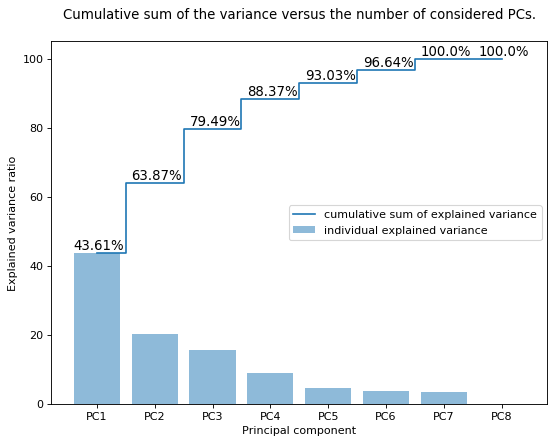

In [13]:
labels = ["PC" + str(x) for x in range(1, len(variance_explained)+1)]

plt.figure( figsize=(8, 6), dpi=80)

# plot explained variances
plt.bar(range(1,len(variance_explained)+1), variance_explained, alpha=0.5,
        align='center', label='individual explained variance',tick_label=labels)

plt.step(range(1,len(cumulative_variance_explained)+1), cumulative_variance_explained, where='mid',
         label='cumulative sum of explained variance')

for i, var_exp in zip(range(1,len(cumulative_variance_explained)+1), cumulative_variance_explained):
    plt.annotate(str(round(var_exp,2)) + "%"
                 ,xy=(i-0.4, var_exp+1)
                 ,fontsize=12
                 ,color='black')


plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.legend(loc='center right')
plt.title("Cumulative sum of the variance versus the number of considered PCs.\n")
plt.show()

This plot shows that the first component explain the majority of the variance in our data.

In [14]:
# Get the frist PCs retaining 90% of variance

retaining_value = 90
r = 0

while(True):
    if retaining_value < cumulative_variance_explained[r]:
        print(f"{labels[r]} retaining {retaining_value}% with {round(cumulative_variance_explained[r],2)}%")
        r += 1
        print(f"r = {r}")
        break;
    r += 1

PC5 retaining 90% with 93.03%
r = 5


For retaining of 90%, we have to take the first 5 PCs (r = 5). For this visualization use case, we will quickly compress the data to DSc and plot just the first two. We do this to notice if there are any clear clusters. 

## Compress DS1 to the first r PCs and resulting dataset DSc.

In [15]:
#  Project the data ontor r dimension
DSc = projectData(DS1_norm.values, U, r)
DSc

array([[ 1.97164236e+00, -1.94960489e-01,  1.85582307e-01,
         3.37849317e-01, -4.60688851e-02],
       [-4.06218559e-01,  3.59058394e-01,  2.72789720e-01,
        -5.28693690e-01,  3.19285864e-01],
       [ 1.70505315e+00, -2.60906938e-01, -2.40334112e-01,
         9.54847917e-01, -1.48207146e+00],
       ...,
       [ 1.77005812e+00,  1.89317672e-02,  1.11483923e+00,
        -9.23059462e-01,  1.11685557e+00],
       [ 8.99668135e-01,  1.80743741e-01,  1.18210877e+00,
        -6.07648029e-01,  6.27604885e-01],
       [ 1.86941108e+00,  9.14683588e-04,  1.14451002e+00,
        -9.64939806e-01,  9.60758061e-01]])

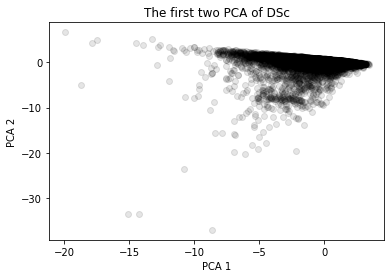

In [16]:
%matplotlib inline

plt.figure()
plt.scatter(DSc[:,0], DSc[:, 1], color="black", alpha=0.1)
plt.title("The first two PCA of DSc")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Shows two distinguishable clusters. One is clearly visible, very large and close above the slightly smaller, horizontally elongated cluster. This factoid tells us that the observations in the data set can be grouped together. However, it does not show all the significant main components. To visualize the rest of the reduced data set with much greater granularity, we will use k-means clustering.

# Task 3

Implementation of k-means algorithm and proving with some plots that the implementation works.

Two random examples for testing k-Means alogorithmus.


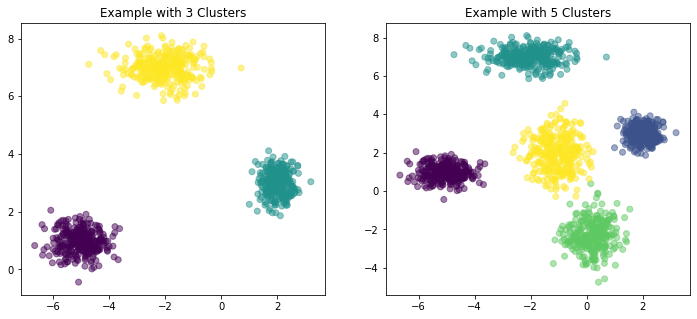

In [17]:
random.seed(99)

def generate_dataset(mu, sigma, amount_of_datapoints, label_name):
    x1 = np.random.normal(mu[0], sigma[0], amount_of_datapoints) 
    x2 = np.random.normal(mu[1], sigma[1], amount_of_datapoints) 
    
    X = []
    label = []
    for i in range(amount_of_datapoints):
        X.append([x1[i], x2[i]])
        label.append(label_name)
        
    return np.array(X), np.array(label)

datapoints = 300

mu1        = [-5.0 , 1.0]
sigma1     = [random.uniform(0.2, 1) ,random.uniform(0.2, 1)]
x1, label1 = generate_dataset(mu1, sigma1, datapoints, 0)

mu2        = [2.0 , 3.0]
sigma2     = [random.uniform(0.2, 1) ,random.uniform(0.2, 1)]
x2, label2 = generate_dataset(mu2, sigma2, datapoints, 1)

mu3        = [-2.0 , 7.0]
sigma3     = [random.uniform(0.2, 1) ,random.uniform(0.2, 1)]
x3, label3 = generate_dataset(mu3, sigma3, datapoints, 2)

mu4        = [0.2 , -2.3]
sigma4     = [random.uniform(0.2, 1) ,random.uniform(0.2, 1)]
x4, label4 = generate_dataset(mu4, sigma4, datapoints, 3)

mu5        = [-1.0 , 2.0]
sigma5     = [random.uniform(0, 1) ,random.uniform(0, 1)]
x5, label5 = generate_dataset(mu5, sigma5, datapoints, 4)

X_3      = np.concatenate((x1, x2, x3), axis=0)
labels_3 = np.concatenate((label1, label2, label3), axis=0)

X_5      = np.concatenate((x1, x2, x3, x4, x5), axis=0)
labels_5 = np.concatenate((label1, label2, label3, label4, label5), axis=0)


print("Two random examples for testing k-Means alogorithmus.")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Example with 3 Clusters")
plt.scatter(X_3[:,0], X_3[:, 1], c=labels_3, alpha=0.5)


plt.subplot(1, 2, 2)
plt.title("Example with 5 Clusters")
plt.scatter(X_5[:,0], X_5[:, 1], c=labels_5, alpha=0.5)
plt.show() 


In [18]:
def kMeansInitCentroids(X, K):
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    randidx   = np.random.permutation(m)
    
    centroids = X[randidx[:K], :]
    
    return centroids

In [19]:
def computeCentroids(X, idx, K):
   
    n = X.shape[1]

    centroids = np.zeros((K, n))
    
    for i in range(K):
        x_val = idx == i
        centroids[i, :] = [np.mean(X[x_val, dim]) for dim in range(n)]
        
    return centroids

In [20]:
def findClosestCentroids(X, centroids):
    # Computes the centroid memberships for every example.
   
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        minimum = sys.maxsize
        for j in range(centroids.shape[0]):
            distances = sum( (X[i,:] - centroids[j,:])**2 )
        
            if minimum > distances:
                minimum = distances
                idx[i] = j
                
    return idx

In [21]:
def inertia(feature_matrix, centroid, idx):
    sum_ = []
    sum_.append([np.sum((feature_matrix[i] - centroid[j])**2) 
                  for j in range(centroid.shape[0]) 
                  for i in range(len(idx)) 
                    if idx[i] == j])
  
    return np.sum(sum_) / feature_matrix.shape[0]

def runkMeans(X, centroids, max_iters, test_iter, test_end):
   
    K = centroids.shape[0]
    idx = None
    idx_history = []
    centroid_history = []
    distance_history = []
    
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)

        centroids = computeCentroids(X, idx, K)
        
        sum_square_distance = inertia(X, centroids, idx)
        
        idx_history.append(idx)
        centroid_history.append(centroids)
        distance_history.append(sum_square_distance)
        
        if (i > 0) and (np.array_equal( centroid_history[i-1], centroid_history[i] ) ):
            print(f"Note: {test_iter+1}/{test_end}: Centroid stopped after {i} iteration. ")
            return centroids, idx, idx_history, centroid_history, distance_history

    return centroids, idx, idx_history, centroid_history, distance_history


def bestkMean(X, K, max_iters=10, test_iters=5):
    min_best_distanz = []
    
    best_centroids = []
    best_idx = []
    best_history = []
    best_centroid_history = []
    best_inertia_history = []
    
    for i in range(test_iters):
        initial_centroids = kMeansInitCentroids(X, K)
        centroids, idx, idx_history, centroid_history, inertia_history = runkMeans(X, initial_centroids, max_iters, i, test_iters)
        min_best_distanz.append(inertia_history[-1])
        
        best_centroids.append( centroids)
        best_idx.append( idx)
        best_history.append( idx_history)
        best_centroid_history.append(centroid_history )
        best_inertia_history.append( inertia_history)

    index = best_inertia_history.index(min(best_inertia_history))

    return best_centroids[index], best_idx[index], best_history[index], best_centroid_history[index], best_inertia_history[index]

Note: 0/5: Centroid stopped after 2 iteration. 
Note: 1/5: Centroid stopped after 1 iteration. 
Note: 2/5: Centroid stopped after 1 iteration. 
Note: 3/5: Centroid stopped after 2 iteration. 
Note: 4/5: Centroid stopped after 2 iteration. 


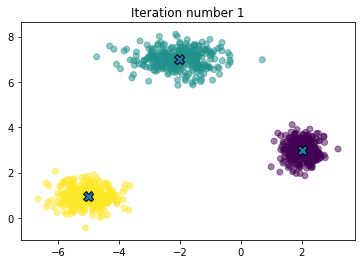

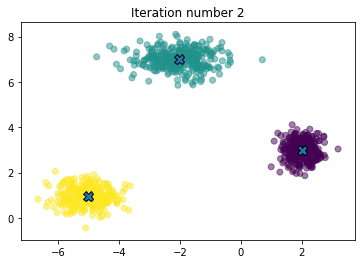

In [22]:
%matplotlib inline
    
K = 3   # 3 Centroids
max_iters = 15


[centroids, idx, idx_history, centroid_history, inertia_history] = bestkMean(X_3, 3, max_iters) #runkMeans(X_3, initial_centroids, max_iters)

for i, (idx, centroid) in enumerate(zip(idx_history, centroid_history)):
    plt.figure()
    plt.plot(centroid[:, 0], centroid[:, 1],'X', mec='k', ms=10)    
    plt.scatter(X_3[:,0], X_3[:, 1], c=idx, alpha=0.5)
    plt.title(f"Iteration number {(i+1)}")
    plt.show

We can see that the k-Mean algorithm works in this simple example. Let's expand the cluster to five.


Note: 0/5: Centroid stopped after 5 iteration. 
Note: 1/5: Centroid stopped after 23 iteration. 
Note: 2/5: Centroid stopped after 5 iteration. 
Note: 3/5: Centroid stopped after 5 iteration. 
Note: 4/5: Centroid stopped after 11 iteration. 


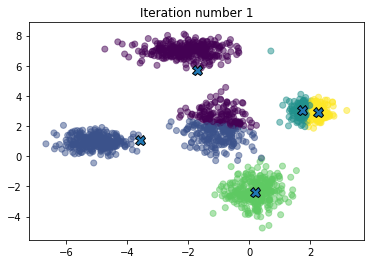

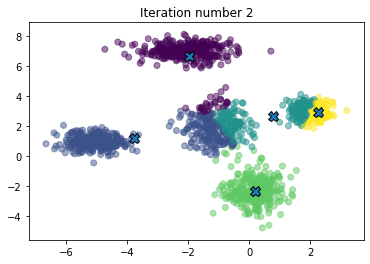

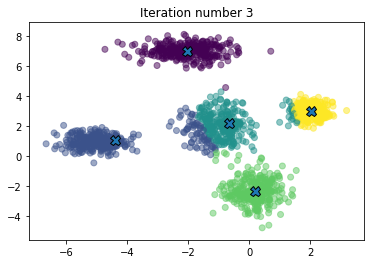

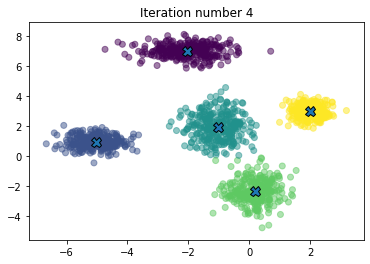

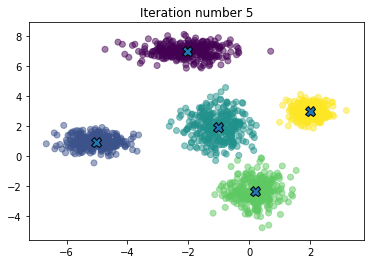

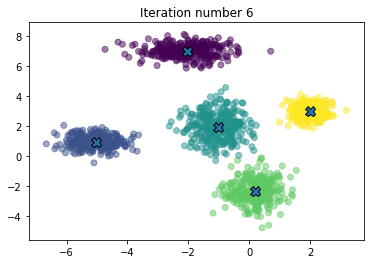

In [23]:
K = 5  
max_iters = 25

[centroids, idx, idx_history, centroid_history, inertia_history] = bestkMean(X_5, K, max_iters)

for i, (idx, centroid) in enumerate(zip(idx_history, centroid_history)):
    plt.figure()
    plt.plot(centroid[:, 0], centroid[:, 1],'X', mec='k', ms=10)    
    plt.scatter(X_5[:,0], X_5[:, 1], c=idx, alpha=0.5)
    plt.title(f"Iteration number {(i+1)}")
    plt.show()

Even with 5 clusters he always gets along well. The algorithm works.


# Task 4

Calculate first the inertia or DS1 and DSc for 2 ≤ k ≤ 20 to represent the Elbow-Curve to finaly decide which k can best be used for clustering.

In [25]:
# Note: This cell may take a while. 45-60 minute.

distortions_DS1 = []
distortions_DSc = []

max_iters = 25

K = range(2,21)
for k in K:
    print(k)
    _, _, _, _, inertia_history = bestkMean(DS1_norm.values, k, max_iters, 2) 
    distortions_DS1.append(inertia_history[-1])
    
    _, _, _, _, inertia_history = bestkMean(DSc, k, max_iters, 2) 
    distortions_DSc.append(inertia_history[-1])


2
Note: 0/2: Centroid stopped after 19 iteration. 
Note: 1/2: Centroid stopped after 14 iteration. 
Note: 0/2: Centroid stopped after 23 iteration. 
Note: 1/2: Centroid stopped after 15 iteration. 
3
Note: 0/2: Centroid stopped after 17 iteration. 
Note: 1/2: Centroid stopped after 18 iteration. 
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


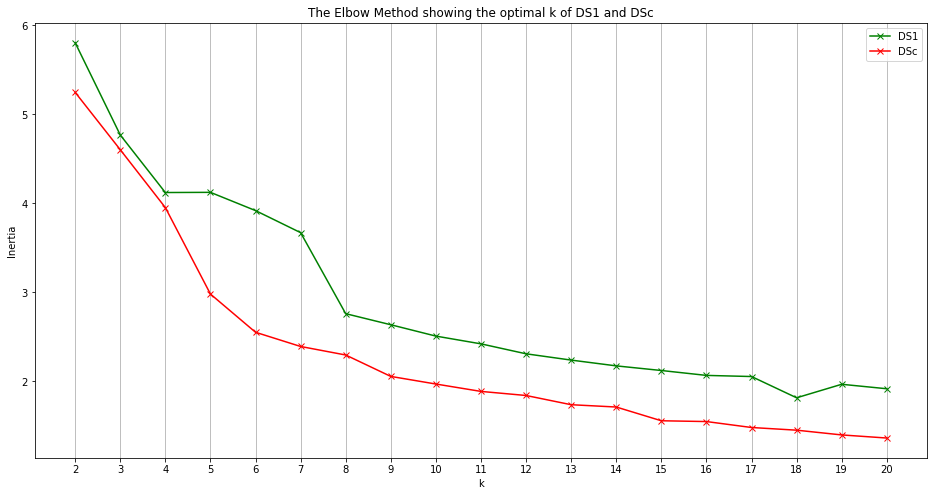

In [26]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions_DS1, 'bx-', color="green")
plt.plot(K, distortions_DSc, 'bx-', color="red")
plt.legend(["DS1", "DSc"])
plt.xticks(K) 

plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k of DS1 and DSc')

axes = plt.gca()
axes.xaxis.grid()

plt.show()

We see that inertia decreases significantly until the number of clusters is 6 and then does not change as much anymore. This means that the optimal number of clusters is 6. Therefore we can discard everything after k=6 and proceed to the last step in the process.

In [27]:
k = 6

# Task 5

First we cluster DS1 with the number of k, which we determined with the Elbowmethod.

In [29]:
max_iters = 100

[centroids, idx, idx_history, centroid_history, inertia_history] = bestkMean(DS1_norm.values, k, max_iters)

Note: 0/5: Centroid stopped after 24 iteration. 
Note: 1/5: Centroid stopped after 58 iteration. 
Note: 2/5: Centroid stopped after 40 iteration. 
Note: 3/5: Centroid stopped after 41 iteration. 
Note: 4/5: Centroid stopped after 28 iteration. 


In [38]:
#  Project the data onto 3 dimension
dim = 3
Z_3d = projectData(DS1_norm.values, U, dim)
centroids_3d = projectData(centroids, U, dim)

Now we take the same 3D model with the first three PCA as in Task1, but visualize it with the evaluated cluster

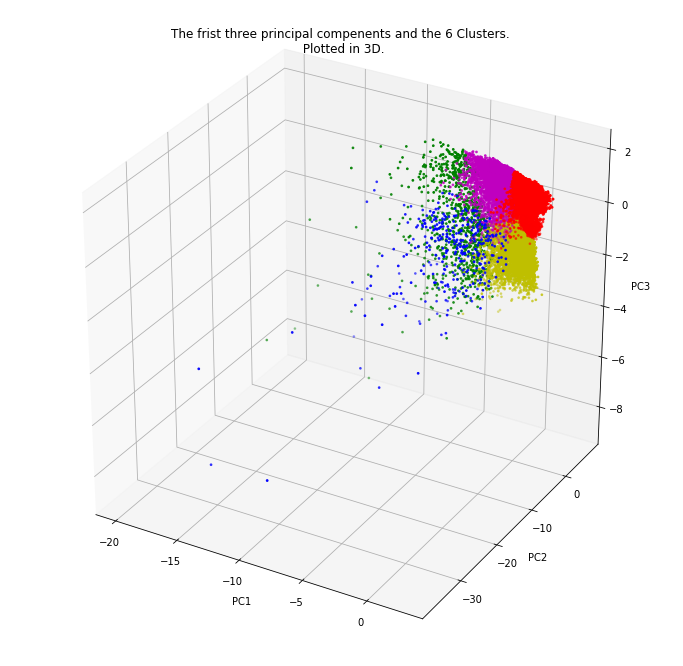

In [31]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

colors = ["r", "g", "b", "y", "m", "k"]
for i in range(0, k-1):
    colors[i]
    ax.scatter(Z_3d[idx==i][:, 0], Z_3d[idx==i][:, 1], Z_3d[idx==i][:, 2], c=colors[i], s=3)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3");

plt.title("The frist three principal compenents and the 6 Clusters. \n Plotted in 3D.")

plt.show()

For an even better overview once again from all sides.

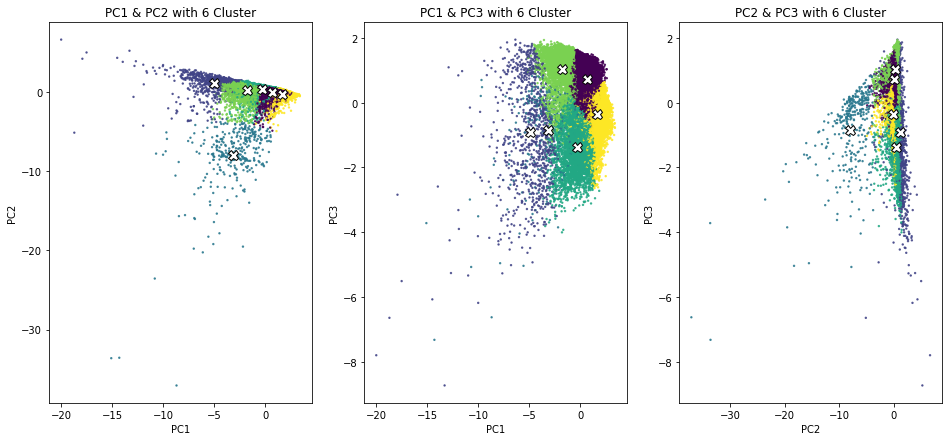

In [54]:
size = 2
alpha = 0.8

plt.figure(figsize=(16, 7))

plt.subplot(1, 3, 1)
plt.scatter(Z_3d[:,0], Z_3d[:, 1], c=idx, s=size,  alpha=alpha)
for i in range(centroids_3d.shape[0]):
    plt.plot(centroids_3d[i][0], centroids_3d[i][1],'X', c="white",  mec='k', ms=10)   

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f"PC1 & PC2 with 6 Cluster")

plt.subplot(1, 3, 2)
plt.scatter(Z_3d[:,0], Z_3d[:, 2], c=idx, s=size,  alpha=alpha)
for i in range(centroids_3d.shape[0]):
    plt.plot(centroids_3d[i][0], centroids_3d[i][2],'X', c="white",  mec='k', ms=10)   
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title(f"PC1 & PC3 with 6 Cluster")

plt.subplot(1, 3, 3)
plt.scatter(Z_3d[:,1], Z_3d[:, 2], c=idx, s=size,  alpha=alpha)
for i in range(centroids_3d.shape[0]):
    plt.plot(centroids_3d[i][1], centroids_3d[i][2],'X', c="white",  mec='k', ms=10)   
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title(f"PC2 & PC3 with 6 Cluster")

plt.show()

The result is pleasing. The centroids, as you can see on these plots, have found their perfect place in this large dense data cloud and the data points are divided into 6 clean clusters. 